### Impotación de Base de Datos

In [1]:
import pandas as pd # Importar la biblioteca pandas
import yfinance as yf # Importar la biblioteca yfinance

# Definir la variable petróleo
petroleo = "CL=F"

# Definir el rango de fechas para los datos históricos
inicio = "2000-08-23"
fin = "2025-05-01"

# Descargar los datos históricos de Yahoo Finance
df = yf.download(petroleo, start=inicio, end=fin, auto_adjust=False)

# Aplanar columnas si vienen con múltiples niveles
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Convierte el índice Date en una columna
df.reset_index(inplace=True)  

# Imprimir la información del dataframe
print(df.info())


# Renombrar las columnas a español
df.rename({'Open':'Apertura', 'High':'Max', 'Low': 'Min',
           'Close': 'Cierre', 'Adj Close':'Adj_Cierre', 'Volume': 'Volumen', 'Date': 'Fecha'}, axis=1, inplace=True)

df

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6197 entries, 0 to 6196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6197 non-null   datetime64[ns]
 1   Adj Close  6197 non-null   float64       
 2   Close      6197 non-null   float64       
 3   High       6197 non-null   float64       
 4   Low        6197 non-null   float64       
 5   Open       6197 non-null   float64       
 6   Volume     6197 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 339.0 KB
None


Price,Fecha,Adj_Cierre,Cierre,Max,Min,Apertura,Volumen
0,2000-08-23,32.049999,32.049999,32.799999,31.950001,31.950001,79385
1,2000-08-24,31.629999,31.629999,32.240002,31.400000,31.900000,72978
2,2000-08-25,32.049999,32.049999,32.099998,31.320000,31.700001,44601
3,2000-08-28,32.869999,32.869999,32.919998,31.860001,32.040001,46770
4,2000-08-29,32.720001,32.720001,33.029999,32.560001,32.820000,49131
...,...,...,...,...,...,...,...
6192,2025-04-24,62.790001,62.790001,63.310001,61.990002,62.340000,264908
6193,2025-04-25,63.020000,63.020000,63.410000,61.799999,62.860001,283758
6194,2025-04-28,62.049999,62.049999,63.919998,61.480000,63.490002,276116
6195,2025-04-29,60.419998,60.419998,62.070000,60.119999,61.869999,312373


In [2]:
df.dtypes

Price
Fecha         datetime64[ns]
Adj_Cierre           float64
Cierre               float64
Max                  float64
Min                  float64
Apertura             float64
Volumen                int64
dtype: object

In [3]:
df.select_dtypes(include='number').describe()

Price,Adj_Cierre,Cierre,Max,Min,Apertura,Volumen
count,6197.000000,6197.000000,6197.000000,6197.000000,6197.000000,6.197000e+03
mean,64.721523,64.721523,65.728257,63.661911,64.732167,3.038315e+05
std,24.910610,24.910610,25.167871,24.609504,24.903357,2.093372e+05
min,-37.630001,-37.630001,13.690000,-40.320000,-14.000000,0.000000e+00
25%,45.880001,45.880001,46.730000,44.939999,45.799999,1.202440e+05
50%,63.970001,63.970001,65.000000,63.099998,64.050003,2.761160e+05
75%,82.620003,82.620003,83.599998,81.379997,82.550003,3.953930e+05
max,145.289993,145.289993,147.270004,143.220001,145.190002,2.288230e+06


In [4]:
df = df[['Fecha', 'Cierre']]
df.set_index('Fecha', inplace=True)
df.head()

Price,Cierre
Fecha,
2000-08-23,32.049999
2000-08-24,31.629999
2000-08-25,32.049999
2000-08-28,32.869999
2000-08-29,32.720001


In [5]:
df.dtypes

Price
Cierre    float64
dtype: object

In [6]:
import numpy as np
import pandas as pd
from scipy import stats

# Create a random dataset
data = df['Cierre']

# Compute statistical measures using NumPy
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
variance = np.var(data)

# Compute additional statistical measures using Pandas
data_series = pd.Series(data)
min_value = data_series.min()
max_value = data_series.max()
quantiles = data_series.quantile([0.25, 0.5, 0.75])

# Perform hypothesis testing using SciPy
t_statistic, p_value = stats.ttest_1samp(data, 0)

# Mean
mean = np.mean(data)

# Standard deviation
std_dev = np.std(data)

# Skewness
skewness = stats.skew(data)

# Kurtosis
kurtosis = stats.kurtosis(data)

# Jarque-Bera test
jb_statistic, p_value = stats.jarque_bera(data)

# Critical value at 5% significance level
critical_value = stats.chi2.ppf(0.95, df=2)

# Check if JB statistic exceeds critical value
is_normal = jb_statistic <= critical_value

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)
print("Jarque-Bera statistic:", jb_statistic)
print("P-value:", p_value)
print("Critical value (5% significance level):", critical_value)
print("Is normal distribution (at 5% significance level):", is_normal)

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Variance:", variance)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("Quantiles:")
print(quantiles)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Mean: 64.72152332138472
Standard Deviation: 24.908599676363313
Skewness: 0.1849735584089383
Kurtosis: -0.5986137739981432
Jarque-Bera statistic: 127.86459099776654
P-value: 1.716156341386893e-28
Critical value (5% significance level): 5.991464547107979
Is normal distribution (at 5% significance level): False
Mean: 64.72152332138472
Median: 63.970001220703125
Standard Deviation: 24.908599676363313
Variance: 620.4383378373265
Minimum: -37.630001068115234
Maximum: 145.2899932861328
Quantiles:
0.25    45.880001
0.50    63.970001
0.75    82.620003
Name: Cierre, dtype: float64
T-Statistic: 204.52910702037673
P-Value: 1.716156341386893e-28


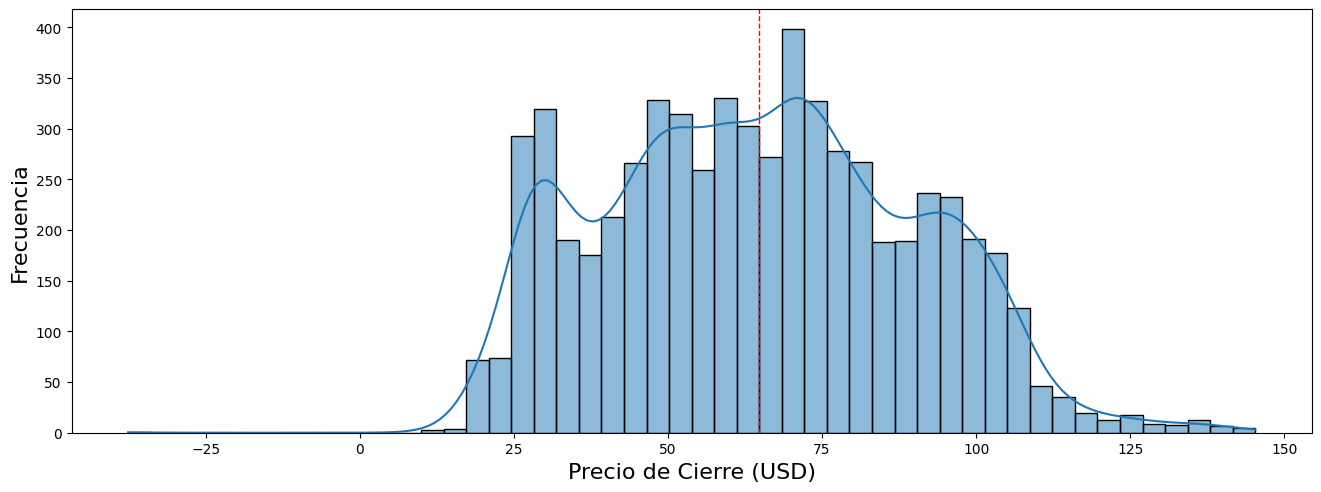

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5.5))
sns.histplot(df['Cierre'], bins=50, kde=True)
#plt.title('Distribución del Precio de Cierre del Petróleo')
plt.xlabel('Precio de Cierre (USD)',fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Media')
plt.savefig("Ilustracion_Precio_Cierre.png", dpi=300, bbox_inches='tight')
plt.show()

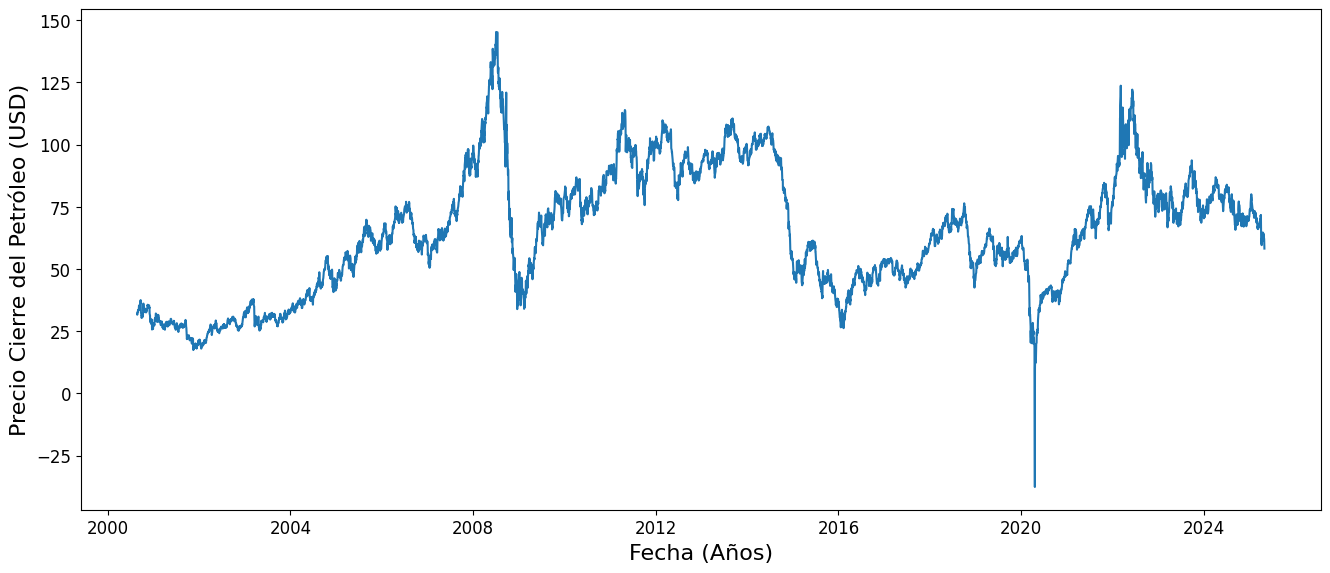

In [8]:
fig, ax = plt.subplots(figsize=(16, 6.5))
ax.plot(df)
#ax.set_title("Evolución del precio del petróleo", fontsize=18)
ax.set_xlabel("Fecha (Años)", fontsize=16)
ax.set_ylabel("Precio Cierre del Petróleo (USD)", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.savefig("Ilustracion.png", dpi=300, bbox_inches='tight')


### Normalización de la Serie

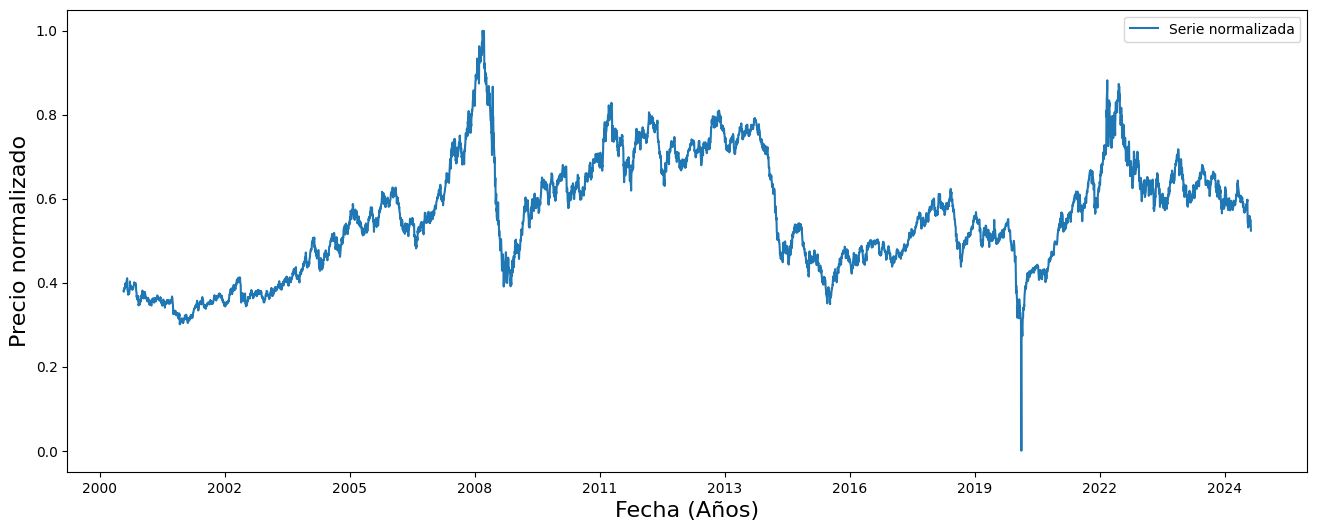

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(df.index, scaled_data, label='Serie normalizada')
plt.xlabel("Fecha (Años)",fontsize=16)
plt.ylabel("Precio normalizado",fontsize=16)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.show()

### Partición de la Base de Datos

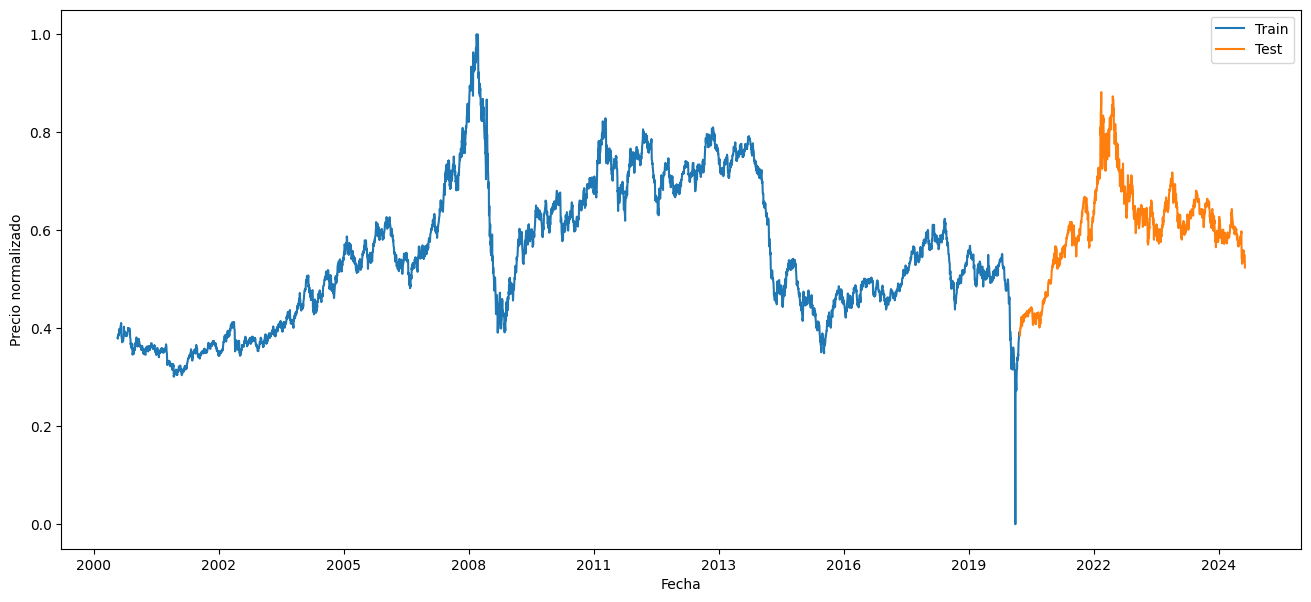

In [10]:
# Definir tamaño de train y test (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))
plt.plot(df.index[:train_size], train_data, label='Train')
plt.plot(df.index[train_size:], test_data, label='Test')
plt.xlabel("Fecha")
plt.ylabel("Precio normalizado")
#plt.title("Serie histórica: Train vs Test")
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.show()

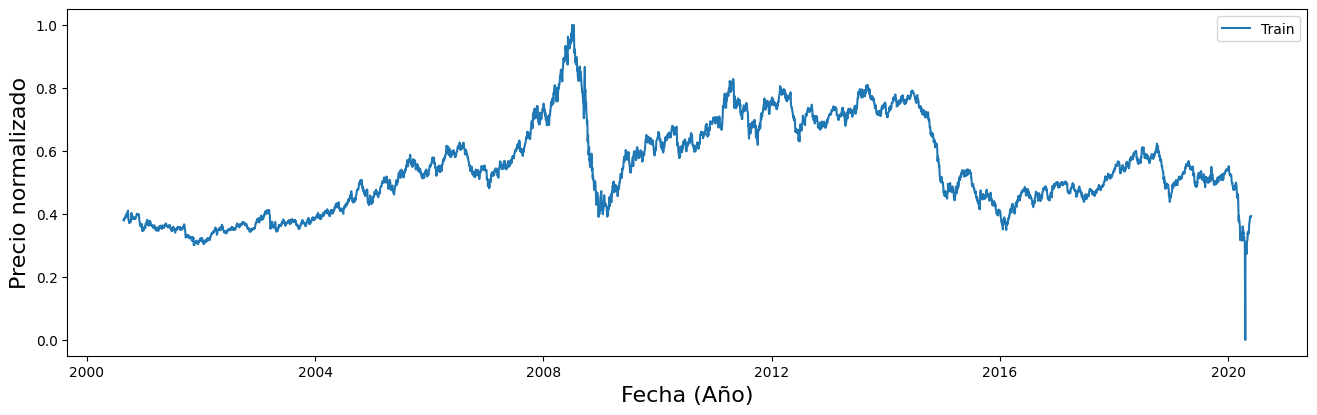

In [11]:
plt.figure(figsize=(16, 4.5))

# Gráfico del set de entrenamiento 
plt.plot(df.index[:train_size], train_data, label='Train')
plt.xlabel('Fecha')
#plt.title('Training Set')
plt.xlabel("Fecha (Año)", fontsize=16)
plt.ylabel("Precio normalizado", fontsize=16)
plt.legend()
plt.show()

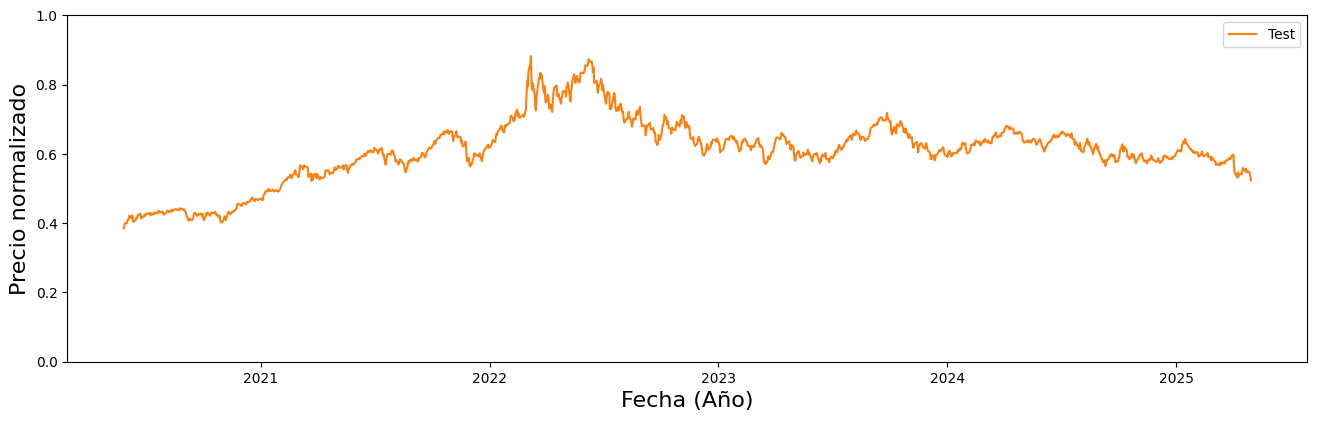

In [12]:
plt.figure(figsize=(16, 4.5))


# Gráfico del set de prueba
plt.plot(df.index[train_size:], test_data, color='#ff7f0e', label='Test')
plt.xlabel('Fecha')
#plt.title('Test Set')
plt.xlabel("Fecha (Año)", fontsize=16)
plt.ylabel("Precio normalizado", fontsize=16)
plt.ylim(0, 1)
plt.legend()
plt.show()

### Long Short-Term Memory (LSTM)

Epoch 1/40


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 - 1s - 6ms/step - loss: 0.0130
Epoch 2/40
154/154 - 0s - 2ms/step - loss: 3.2907e-04
Epoch 3/40
154/154 - 0s - 2ms/step - loss: 3.0809e-04
Epoch 4/40
154/154 - 0s - 2ms/step - loss: 2.9593e-04
Epoch 5/40
154/154 - 0s - 2ms/step - loss: 2.8094e-04
Epoch 6/40
154/154 - 0s - 2ms/step - loss: 2.6577e-04
Epoch 7/40
154/154 - 0s - 2ms/step - loss: 2.5145e-04
Epoch 8/40
154/154 - 0s - 2ms/step - loss: 2.4012e-04
Epoch 9/40
154/154 - 0s - 2ms/step - loss: 2.3177e-04
Epoch 10/40
154/154 - 0s - 2ms/step - loss: 2.2491e-04
Epoch 11/40
154/154 - 0s - 2ms/step - loss: 2.1834e-04
Epoch 12/40
154/154 - 0s - 2ms/step - loss: 2.1177e-04
Epoch 13/40
154/154 - 0s - 2ms/step - loss: 2.0530e-04
Epoch 14/40
154/154 - 0s - 2ms/step - loss: 1.9901e-04
Epoch 15/40
154/154 - 0s - 3ms/step - loss: 1.9291e-04
Epoch 16/40
154/154 - 0s - 3ms/step - loss: 1.8699e-04
Epoch 17/40
154/154 - 0s - 2ms/step - loss: 1.8118e-04
Epoch 18/40
154/154 - 0s - 2ms/step - loss: 1.7542e-04
Epoch 19/40
154/154 - 0s - 2ms/ste

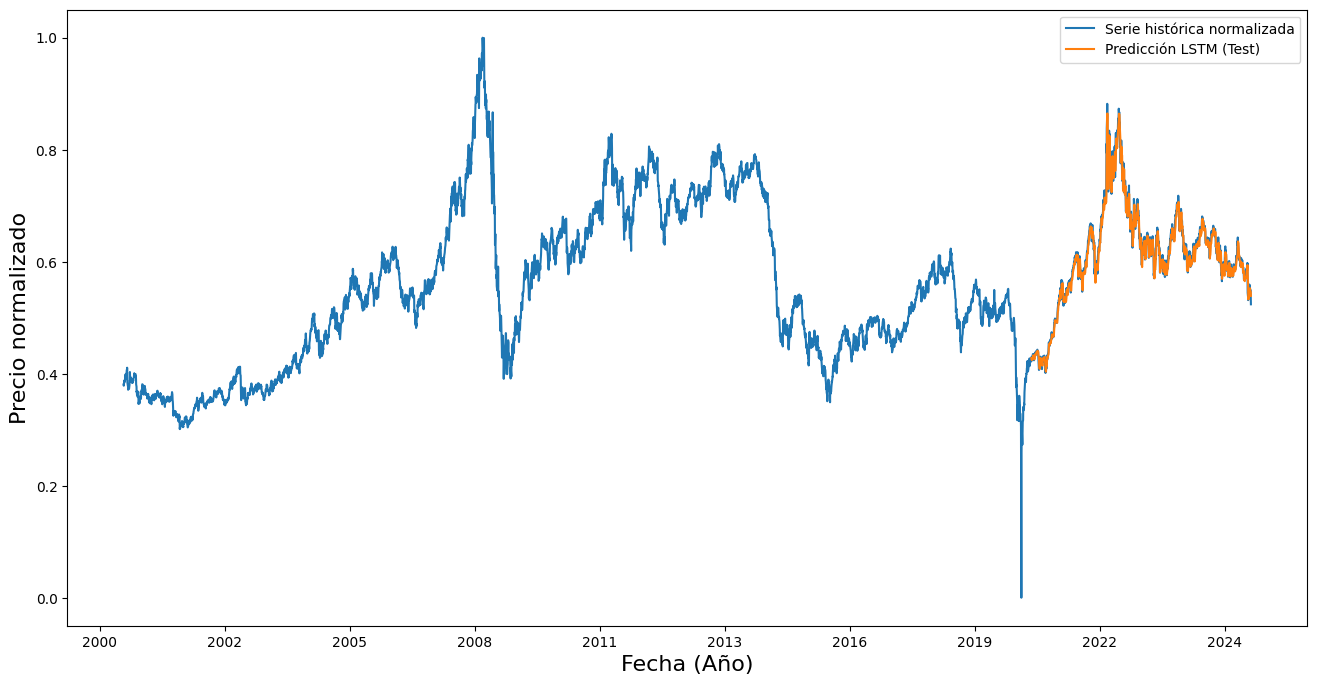

Computation time: 16.03 seconds


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time
import random
import tensorflow as tf

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

def create_lstm_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps):
        dataX.append(dataset[i : i + time_steps])
        dataY.append(dataset[i + time_steps])
    return np.array(dataX), np.array(dataY)

def calculate_metrics(testY, predictions):
    mae = mean_absolute_error(testY, predictions)
    rmse = np.sqrt(mean_squared_error(testY, predictions))
    mask = testY != 0
    mape = np.mean(np.abs((testY[mask] - predictions[mask]) / testY[mask])) * 100
    mse = mean_squared_error(testY, predictions)
    rmse1 = np.sqrt(mse)
    nrmse_mean = rmse1 / np.mean(testY)
    nrmse_maxmin = rmse1 / (np.max(testY) - np.min(testY))
    return mae, rmse, mape, mse, rmse1, nrmse_mean, nrmse_maxmin

start_time = time.time()

# Define el tamaño de los pasos de tiempo
time_steps = 30

# Prepara los datos de entrenamiento
trainX, trainY = create_lstm_dataset(train_data, time_steps)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

# Define y entrena el modelo LSTM
model = Sequential([
    LSTM(50, input_shape=(time_steps, 1)),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=40, batch_size=32, verbose=2)

# Prepara los datos de prueba y realiza predicciones
testX, testY = create_lstm_dataset(test_data, time_steps)
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
predictions = model.predict(testX)

# Calcula las métricas
mae, rmse, mape, mse, rmse1, nrmse_mean, nrmse_maxmin = calculate_metrics(testY, predictions)

# Crea un array para las predicciones alineadas con el histórico
full_predictions = np.empty_like(scaled_data.flatten())
full_predictions[:] = np.nan
full_predictions[-len(predictions):] = predictions.flatten()

# Gráfico con todo el histórico normalizado
plt.figure(figsize=(16, 8))
plt.plot(df.index, scaled_data, label='Serie histórica normalizada')
plt.plot(df.index, full_predictions, label='Predicción LSTM (Test)')
#plt.title("Histórico normalizado y predicción LSTM")
plt.xlabel("Fecha (Año)", fontsize=16)
plt.ylabel("Precio normalizado", fontsize=16)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.show()

end_time = time.time()
print("Computation time: {:.2f} seconds".format(end_time - start_time))

### Reservoir Computing (RC)

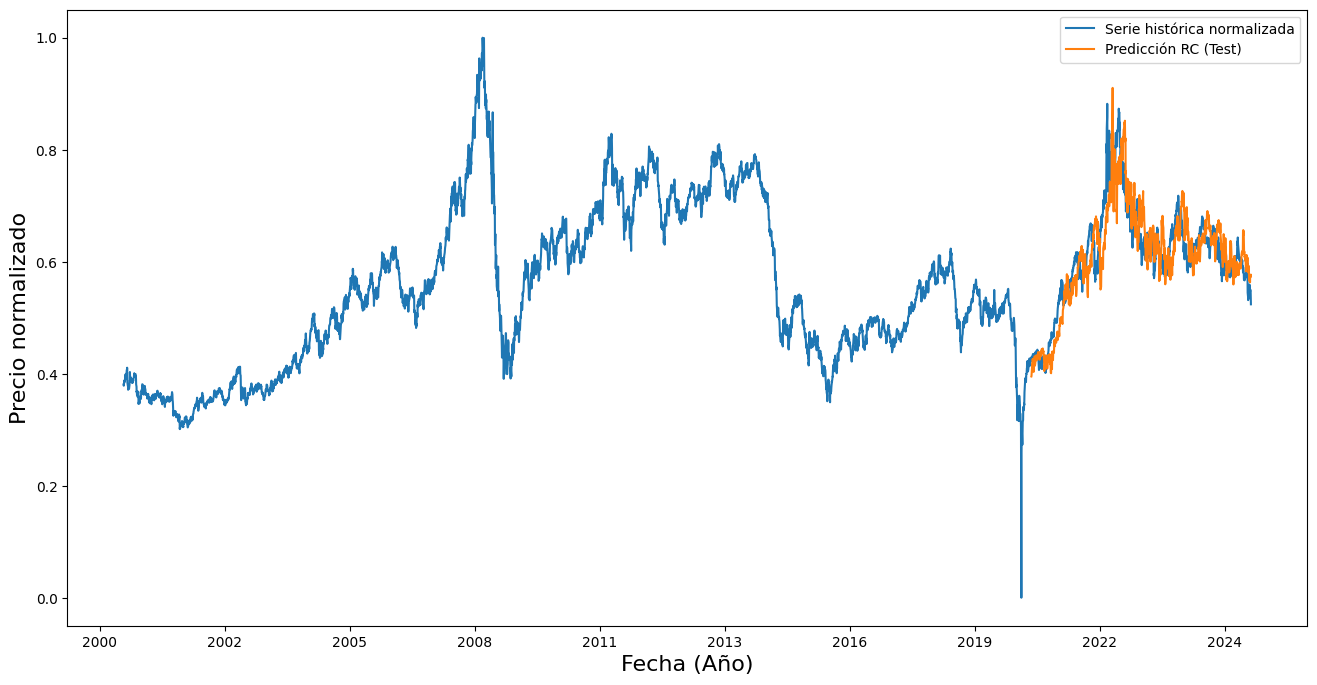

Computation time: 0.46 seconds


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.observables import mse, nrmse, rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

def normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    mse_score = mse(y_true, y_pred)
    rmse_score = rmse_val
    nmrse_mean = nrmse(y_true, y_pred, norm_value=y_true.mean())
    nmrse_maxmin = nrmse(y_true, y_pred, norm_value=y_true.max() - y_true.min())
    r2 = r2_score(y_true, y_pred)
    return mae, rmse_score, mape, mse_score, rmse_score, nmrse_mean, nmrse_maxmin, r2

start_time = time.time()

# --- Normalización y división igual que LSTM ---
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

time_steps = 30
train_size = int(len(scaled_data) * 0.8)
test_size = len(df) - train_size - time_steps

# Para RC, igual que LSTM:
data = scaled_data.flatten()
X_rc = data[:train_size]
y_rc = data[time_steps:train_size + time_steps]
X_test_rc = data[train_size:train_size + test_size]
y_test_rc = data[train_size + time_steps:train_size + time_steps + test_size]

# Fechas para el test (idénticas a las de LSTM)
test_dates = df.index[-test_size:]

# --- Modelo RC ---
SEED = 42
units = 20
leak_rate = 0.75
rho = 1.025
input_scaling = 1.0
rc_connectivity = 0.15
input_connectivity = 0.2
fb_connectivity = 1.1
regularization_coef = 1e-8
warmup = 100
feedback = False

rpy.set_seed(SEED)
rpy.verbosity(0)

reservoir = Reservoir(
    units,
    lr=leak_rate,
    sr=rho,
    input_bias=True,
    input_scaling=input_scaling,
    rc_connectivity=rc_connectivity,
    input_connectivity=input_connectivity,
    fb_connectivity=fb_connectivity,
    name="reservoir",
)
readout = Ridge(ridge=regularization_coef, name="readout")
if feedback:
    reservoir = reservoir << readout
esn = reservoir >> readout

# Entrenamiento
internal_trained = reservoir.run(X_rc.reshape(-1, 1))
reservoir.reset()
esn = esn.fit(X_rc.reshape(-1, 1), y_rc.reshape(-1, 1), warmup=warmup)

# Predicción
y_pred_rc = esn.run(X_test_rc.reshape(-1, 1)).flatten()

# Métricas
mae_rc, rmse_rc, mape_rc, mse_rc, rmse_score_rc, nrmse_mean_rc, nrmse_maxmin_rc, r2_rc = calculate_metrics(y_test_rc, y_pred_rc)


# --- Gráfico completo del histórico normalizado y predicción alineada ---
full_predictions_rc = np.empty_like(data)
full_predictions_rc[:] = np.nan
full_predictions_rc[-test_size:] = y_pred_rc

plt.figure(figsize=(16, 8))
plt.plot(df.index, data, label='Serie histórica normalizada')
plt.plot(df.index, full_predictions_rc, label='Predicción RC (Test)')
plt.xlabel("Fecha (Año)", fontsize=16)
plt.ylabel("Precio normalizado", fontsize=16)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.show()

end_time = time.time()
print("Computation time: {:.2f} seconds".format(end_time - start_time))

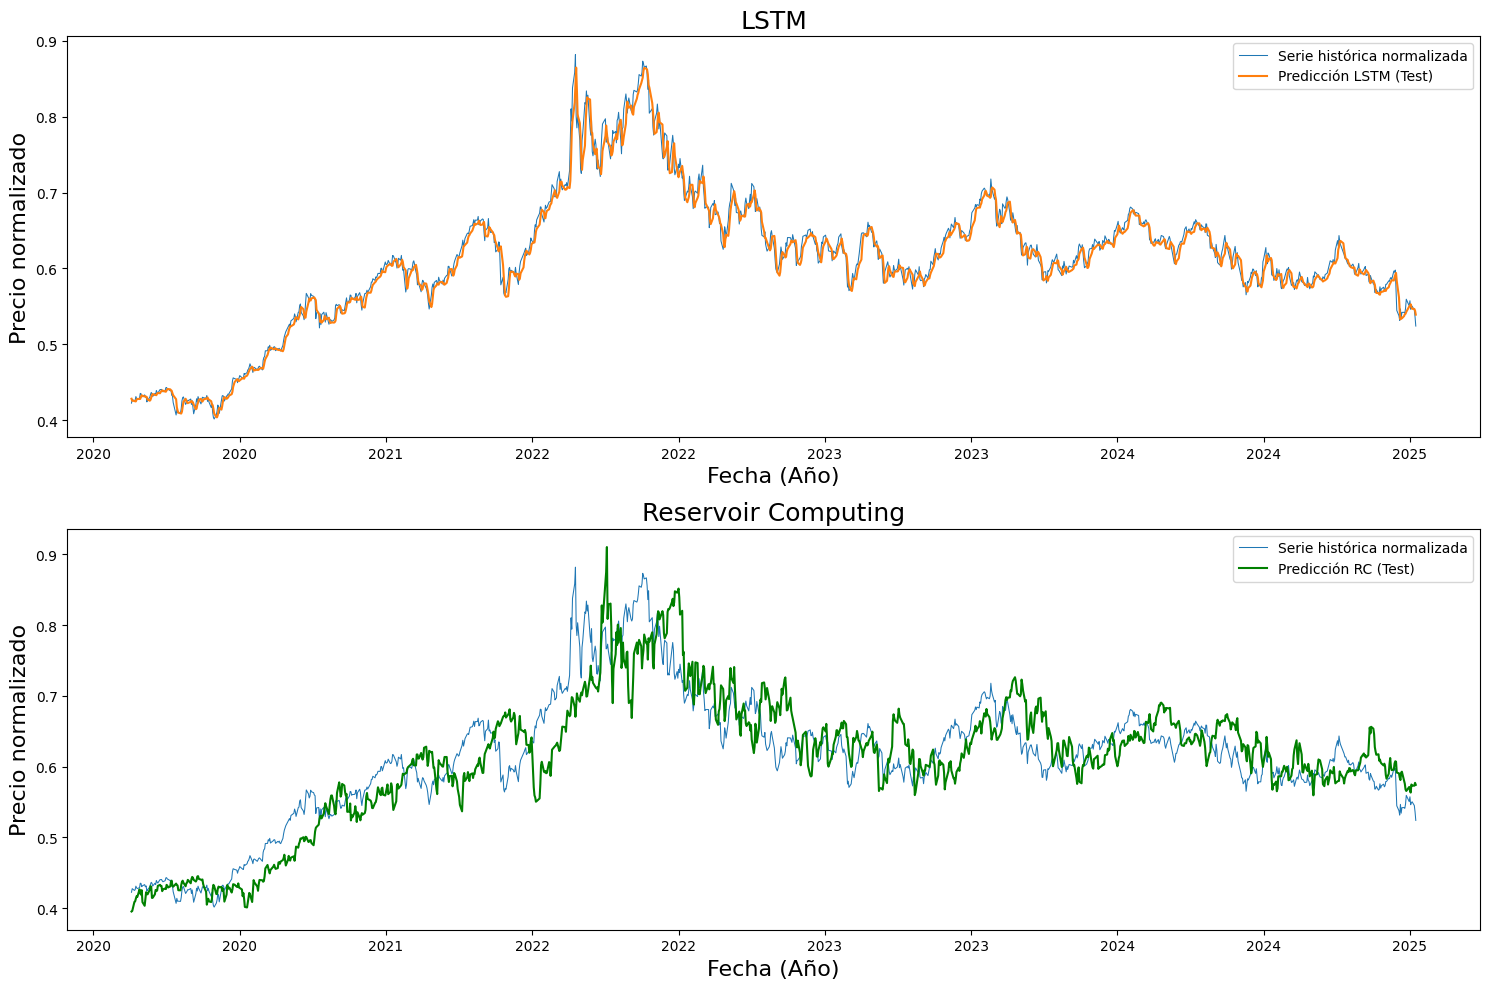

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# LSTM
axs[0].plot(test_dates, testY, lw=0.75, label='Serie histórica normalizada')
axs[0].plot(test_dates, predictions, lw=1.5, label='Predicción LSTM (Test)')
axs[0].set_title('LSTM', fontsize=18   )
axs[0].legend()
axs[0].set_xlabel('Fecha (Año)', fontsize=16)
axs[0].set_ylabel('Precio normalizado', fontsize=16)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Reservoir Computing
axs[1].plot(test_dates, y_test_rc, lw=0.75, label='Serie histórica normalizada')
axs[1].plot(test_dates, y_pred_rc, color='green', lw=1.5, label='Predicción RC (Test)')
axs[1].set_title('Reservoir Computing', fontsize=18)
axs[1].legend()
axs[1].set_xlabel('Fecha (Año)', fontsize=16)
axs[1].set_ylabel('Precio normalizado', fontsize=16)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

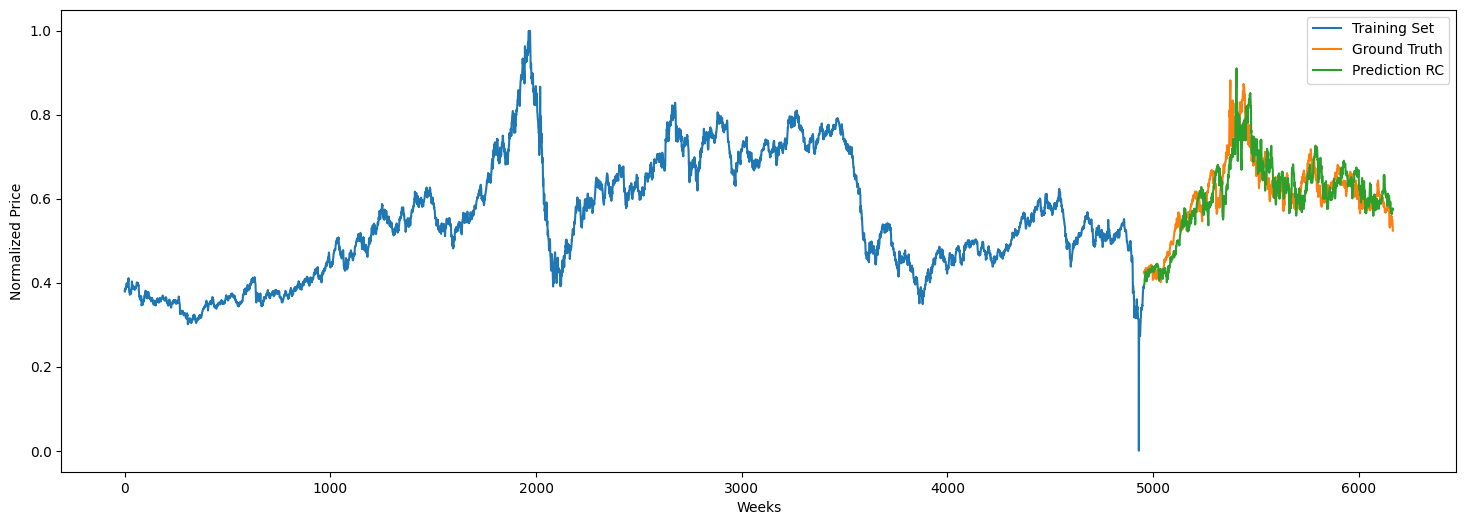

In [16]:
# Use y_pred_rc, X_rc, X_test_rc for RC predictions (already defined in previous cells)
t1 = np.arange(0, len(X_rc))
t2 = np.arange(len(X_rc), len(X_rc) + len(X_test_rc))

# Create plot
fig, ax = plt.subplots(figsize=(18, 6))

# Plot training set
ax.plot(t1, X_rc, label='Training Set')

# Plot ground truth (test set)
ax.plot(t2, y_test_rc, label='Ground Truth')

# Plot RC predictions
ax.plot(t2, y_pred_rc, label='Prediction RC')

# Add labels and legend
ax.set_xlabel('Weeks')
ax.set_ylabel('Normalized Price')
ax.legend()

# Show plot
plt.show()

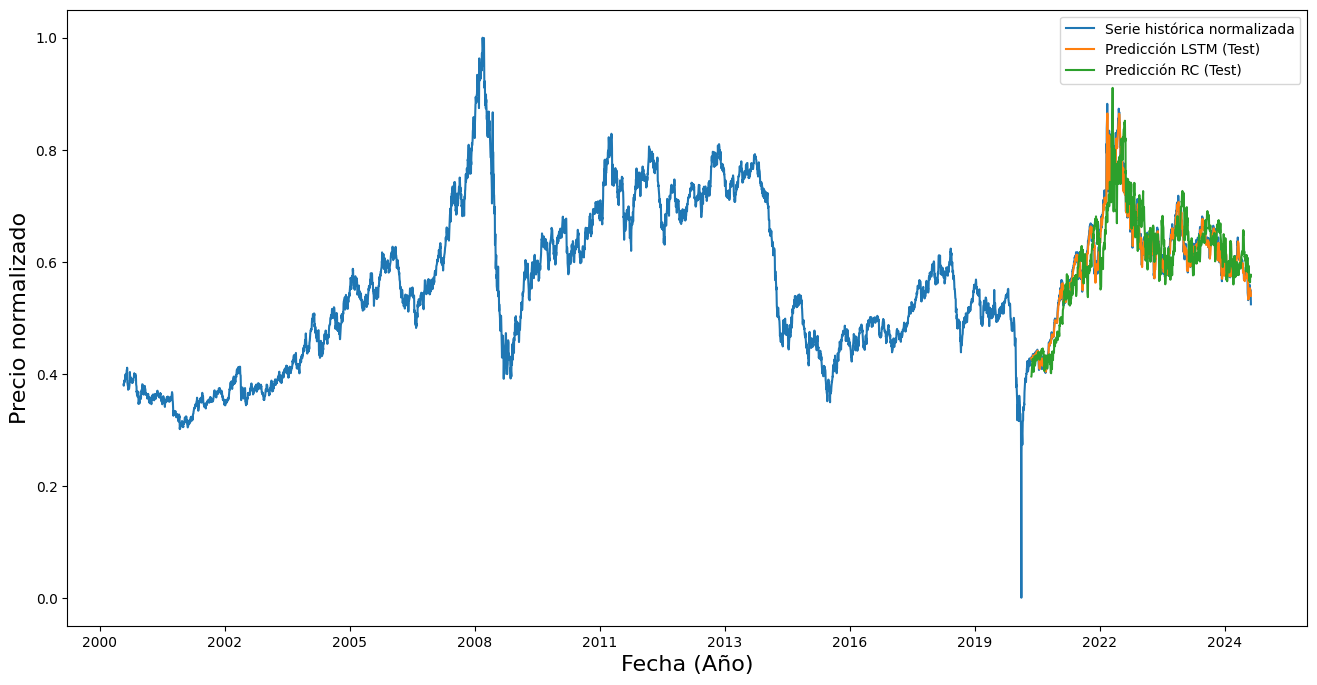

In [17]:
import matplotlib.pyplot as plt

# Crea un array para las predicciones alineadas con el histórico para LSTM
full_predictions_lstm = np.empty_like(scaled_data.flatten())
full_predictions_lstm[:] = np.nan
full_predictions_lstm[-len(predictions):] = predictions.flatten()

# Crea un array para las predicciones alineadas con el histórico para RC
full_predictions_rc = np.empty_like(scaled_data.flatten())
full_predictions_rc[:] = np.nan
full_predictions_rc[-len(y_pred_rc):] = y_pred_rc.flatten()

plt.figure(figsize=(16, 8))
plt.plot(df.index, scaled_data, label='Serie histórica normalizada')
plt.plot(df.index, full_predictions_lstm, label='Predicción LSTM (Test)')
plt.plot(df.index, full_predictions_rc, label='Predicción RC (Test)')
plt.xlabel("Fecha (Año)", fontsize=16)
plt.ylabel("Precio normalizado", fontsize=16)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
#plt.title("Comparación de predicción LSTM vs Reservoir Computing")
plt.show()

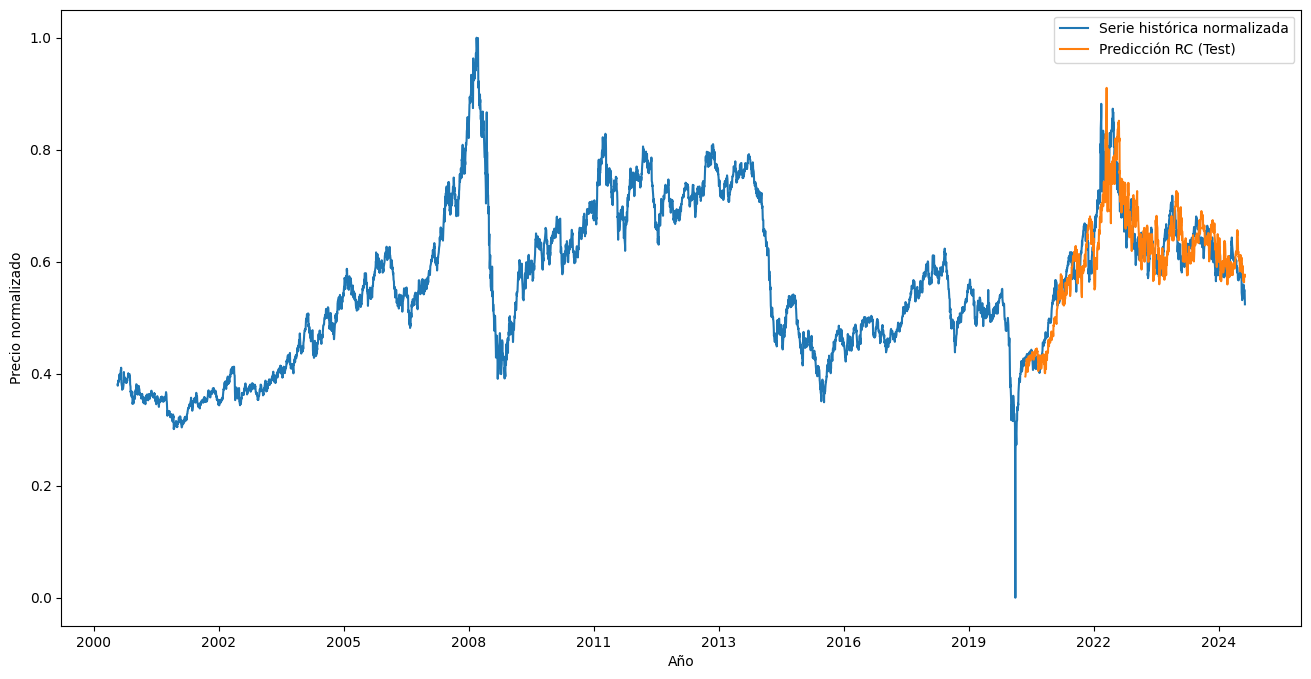

In [18]:
# Crear un array para las predicciones alineadas con el histórico (RC)
full_predictions_rc = np.empty_like(df.values.flatten())
full_predictions_rc[:] = np.nan
full_predictions_rc[-len(y_pred_rc):] = y_pred_rc.flatten()

plt.figure(figsize=(16, 8))
plt.plot(df.index, (df.values - df.values.min()) / (df.values.max() - df.values.min()), label='Serie histórica normalizada')
plt.plot(df.index, full_predictions_rc, label='Predicción RC (Test)')
plt.xlabel("Año")
plt.ylabel("Precio normalizado")
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.show()

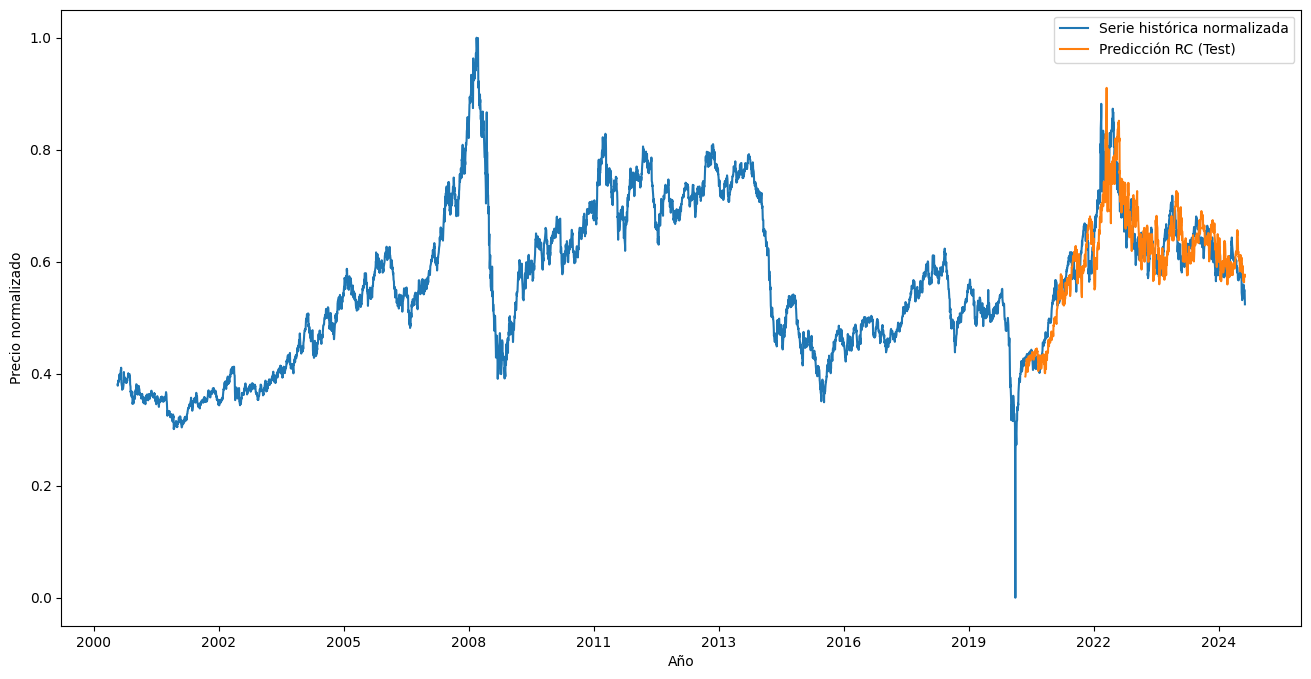

Computation time: 0.46 seconds


In [19]:


# Crea un array para las predicciones alineadas con el histórico para RC
full_predictions_rc = np.empty_like(scaled_data.flatten())
full_predictions_rc[:] = np.nan
full_predictions_rc[-len(y_pred_rc):] = y_pred_rc.flatten()

# Gráfico con todo el histórico normalizado para RC
plt.figure(figsize=(16, 8))
plt.plot(df.index, scaled_data, label='Serie histórica normalizada')
plt.plot(df.index, full_predictions_rc, label='Predicción RC (Test)')
plt.xlabel("Año")
plt.ylabel("Precio normalizado")
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.show()
print("Computation time: {:.2f} seconds".format(end_time - start_time))

In [20]:
# Usar testY y predictions para LSTM, y y_test_rc y y_pred_rc para RC
mse1_value = mse(testY, predictions)  # para LSTM
mse_rc_value = mse(y_test_rc, y_pred_rc)  # para RC

# Mostrar los errores del modelo Reservoir Computing y LSTM
print("Errores del modelo LSTM:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse1:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"MSE: {mse1_value:.4e}")
print(f"NRMSE (max-min): {nrmse_maxmin:.4f}")


print("\nErrores del modelo Reservoir Computing:")
print("MAE: {:.4f}".format(mae_rc))
print("RMSE: {:.4f}".format(rmse_rc))
print("MAPE: {:.4f}%".format(mape_rc))
print("MSE: %.4e" % mse_rc)
print(f"NRMSE (max-min): {nrmse_maxmin_rc:.4f}")

Errores del modelo LSTM:
MAE: 0.0090
RMSE: 0.0121
MAPE: 1.4208%
MSE: 1.4536e-04
NRMSE (max-min): 0.0251

Errores del modelo Reservoir Computing:
MAE: 0.0357
RMSE: 0.0451
MAPE: 5.6988%
MSE: 2.0299e-03
NRMSE (max-min): 0.0937


### MODELO ARIMA

##### PRUEBA DE RAIZ UNITARIA

In [21]:
from statsmodels.tsa.stattools import adfuller
from skopt import gp_minimize
from skopt.space import Integer
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Prueba de estacionariedad (ADF) sobre la serie normalizada
result = adfuller(scaled_data.flatten())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("La serie es estacionaria (rechaza H0)")
else:
    print("La serie NO es estacionaria (no rechaza H0)")

ADF Statistic: -2.8615516460933534
p-value: 0.05000518302972653
La serie NO es estacionaria (no rechaza H0)


In [22]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def check_adf_stationarity(series):
    result = adfuller(series.dropna())
    return result[1]  # Retorna el p-value

# Asegúrate de que scaled_data es un array 1D y conviértelo en Serie de pandas
current_series = pd.Series(scaled_data.flatten())

d = 0

while True:
    p_value = check_adf_stationarity(current_series)
    print(f"d={d} | ADF p-value={p_value:.4f}")

    if p_value < 0.05:
        break
    else:
        current_series = current_series.diff()
        d += 1

print(f"\nNúmero de diferencias requeridas (d): {d}")


d=0 | ADF p-value=0.0500
d=1 | ADF p-value=0.0000

Número de diferencias requeridas (d): 1


In [23]:
# Obtener la serie normalizada con una diferencia (d=1)
serie_norm = pd.Series(scaled_data.flatten(), index=df.index)
serie_norm_diff = serie_norm.diff(periods=1)

# Mostrar las primeras filas
# Mostrar toda la serie diferenciada
serie_norm_diff.head()

Fecha
2000-08-23         NaN
2000-08-24   -0.002296
2000-08-25    0.002296
2000-08-28    0.004483
2000-08-29   -0.000820
dtype: float64

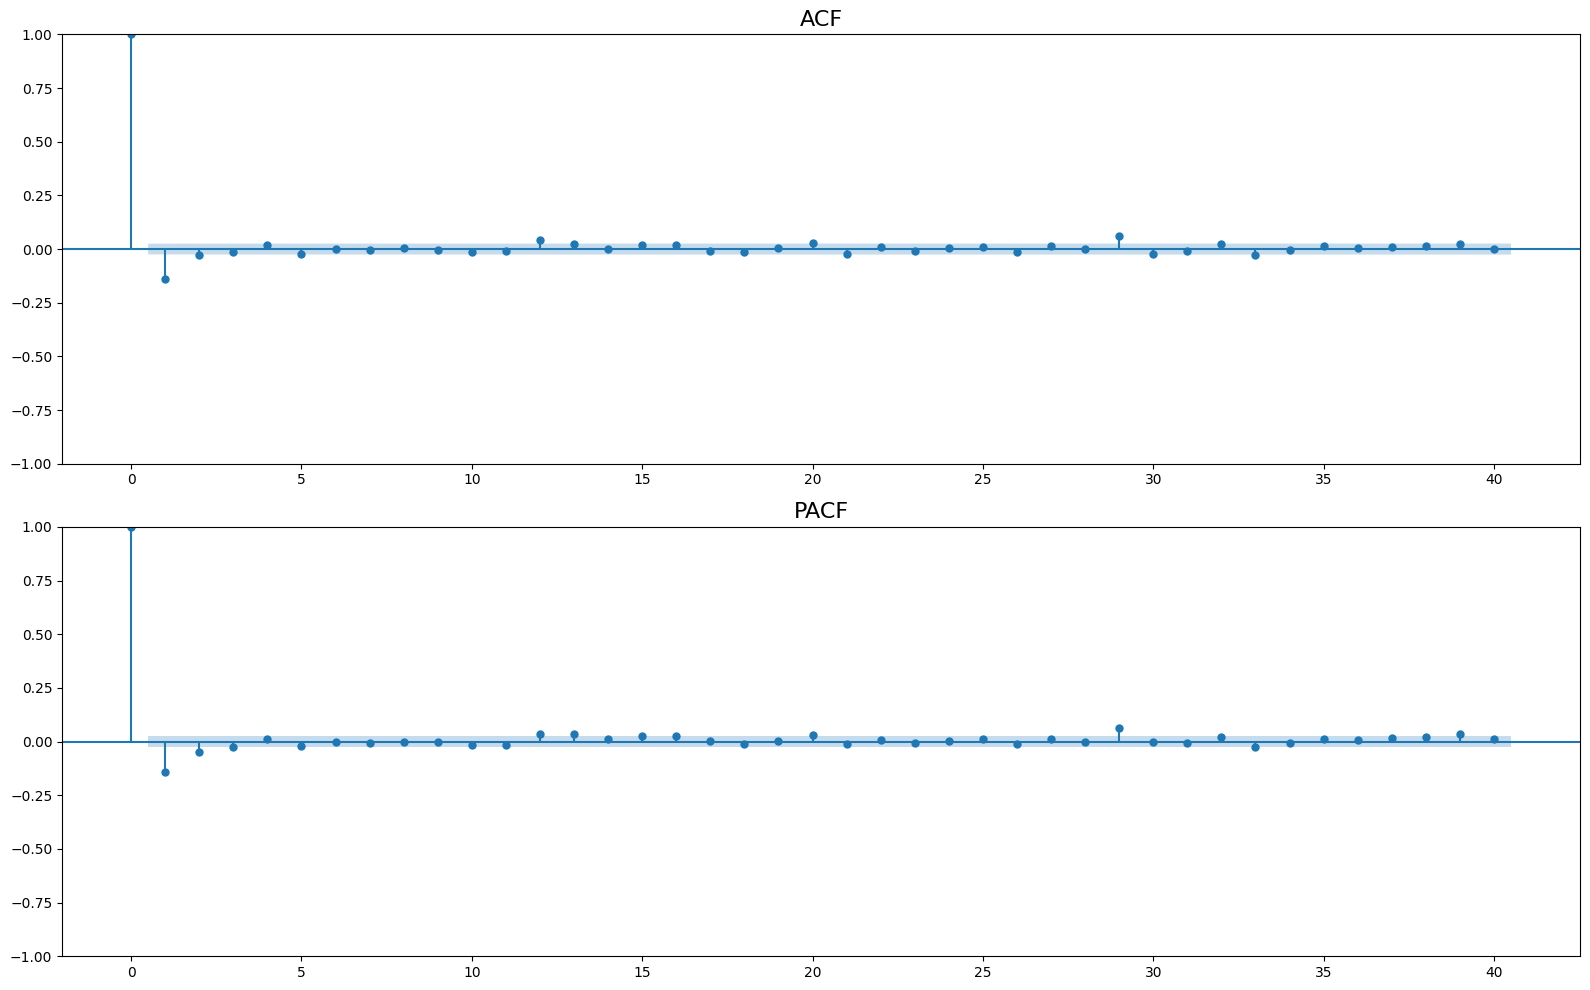

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Elimina los NaN de la serie diferenciada
serie_diff_no_nan = serie_norm_diff.dropna()

fig, axs = plt.subplots(2, 1, figsize=(16, 10))

plot_acf(serie_diff_no_nan, lags=40, ax=axs[0])
axs[0].set_title('ACF', fontsize=16)

plot_pacf(serie_diff_no_nan, lags=40, ax=axs[1], method='ywm')
axs[1].set_title('PACF', fontsize=16)

plt.tight_layout()
plt.show()

In [25]:
from pmdarima import auto_arima

# Usar la serie normalizada completa para auto_arima
serie_norm = pd.Series(scaled_data.flatten(), index=df.index)

# Ejecutar auto_arima para encontrar los mejores parámetros (p, d, q)
auto_model = auto_arima(
    serie_norm,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=None,           # auto detecta el orden de diferenciación
    seasonal=False,   # No estacional
    trace=True,       # Muestra el progreso
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/pytho

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-39696.368, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-39819.175, Time=0.14 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-39830.035, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-39698.334, Time=0.08 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-39834.832, Time=0.49 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-39832.617, Time=1.00 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-39831.092, Time=0.53 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-39834.187, Time=0.45 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-39831.590, Time=0.58 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-39829.263, Time=1.77 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-39836.784, Time=0.17 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-39831.985, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-39821.129, Time=0.08 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-39834.567, Time=0.17 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-39833.037, Time=0.39 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-39836.133, Time=0.34 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-39833.538, Time=0.28 sec


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-39833.097, Time=0.66 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 7.748 seconds


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


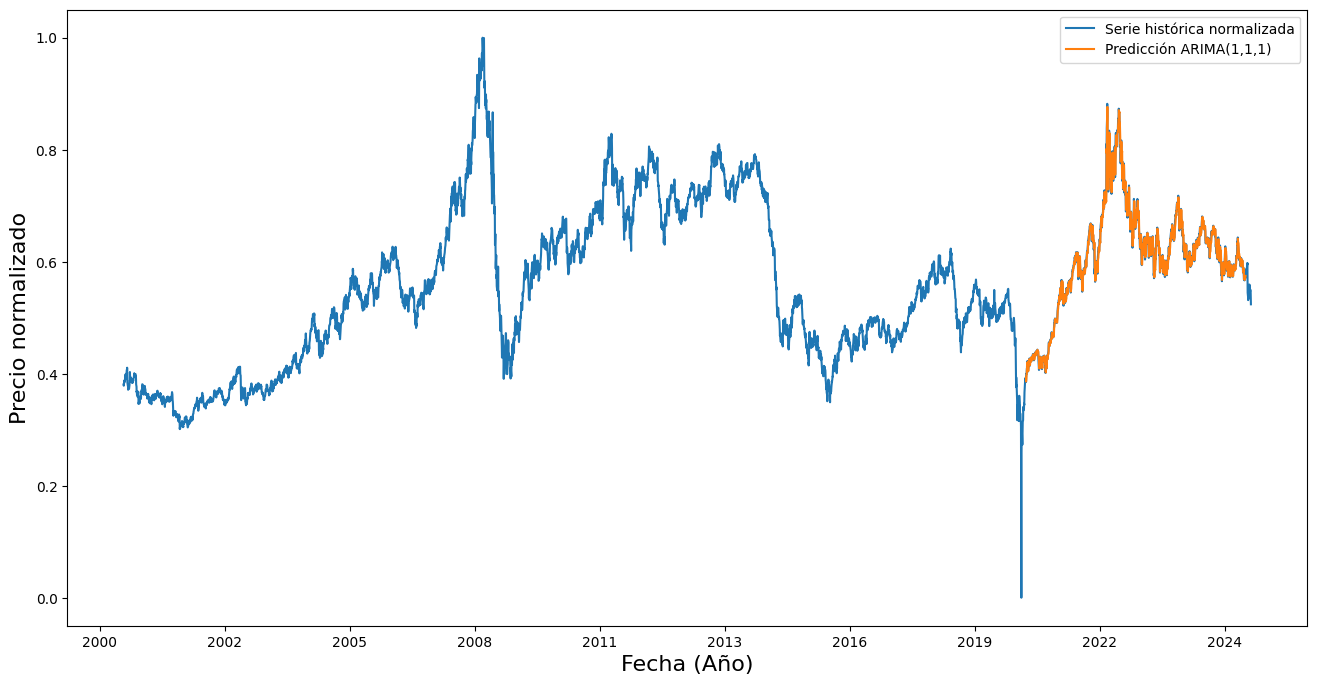

In [26]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Usar la serie normalizada completa como full_series
full_series = pd.Series(scaled_data.flatten(), index=df.index)

# Definir los índices de predicción para el set de test
start_pred = train_size
end_pred = train_size + test_size - 1

# Ajustar el modelo ARIMA(1,1,1) a la serie normalizada completa
model_arima_111 = ARIMA(full_series, order=(1, 1, 1))
model_arima_111_fit = model_arima_111.fit()

# Predecir los valores del set de test
arima_111_pred = model_arima_111_fit.predict(start=start_pred, end=end_pred, typ='levels')

# Graficar la serie normalizada, valores reales y predicción ARIMA(1,1,1)
plt.figure(figsize=(16, 8))
plt.plot(df.index, full_series, label='Serie histórica normalizada')
plt.plot(df.index[start_pred:end_pred+1], arima_111_pred, label='Predicción ARIMA(1,1,1)')
plt.xlabel("Fecha (Año)", fontsize=16)
plt.ylabel("Precio normalizado", fontsize=16)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.show()


In [27]:
# Alinear la longitud de arima_111_pred con testY
arima_111_pred_aligned = arima_111_pred[:len(testY)]

# Calcula las métricas de error para el modelo ARIMA(1,1,1)
mae_arima_111 = mean_absolute_error(testY.flatten(), arima_111_pred_aligned)
rmse_arima_111 = np.sqrt(mean_squared_error(testY.flatten(), arima_111_pred_aligned))
mape_arima_111 = np.mean(np.abs((testY.flatten() - arima_111_pred_aligned) / testY.flatten())) * 100
mse_arima_111 = mean_squared_error(testY.flatten(), arima_111_pred_aligned)
nrmse_arima_111 = rmse_arima_111 / (np.max(testY) - np.min(testY))

print("Errores del modelo ARIMA(1,1,1):")
print(f"MAE: {mae_arima_111:.4f}")
print(f"RMSE: {rmse_arima_111:.4f}")
print(f"MAPE: {mape_arima_111:.4f}%")
print(f"MSE: {mse_arima_111:.4e}")
print(f"NRMSE (max-min): {nrmse_arima_111:.4f}")


Errores del modelo ARIMA(1,1,1):
MAE: 0.0368
RMSE: 0.0463
MAPE: 5.8556%
MSE: 2.1479e-03
NRMSE (max-min): 0.0964
